<h1>RECONBY</h1>
<h4> Unizar </h4>

In [1]:
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# function that returns dPma/dt
def model(Pma,t,Kon,Koff):
    dPmadt = Kon*XylSa*Pm-Koff*Pma
    return dPmadt

# number of time points
n = 401

# time points
t = np.linspace(0,40,n)


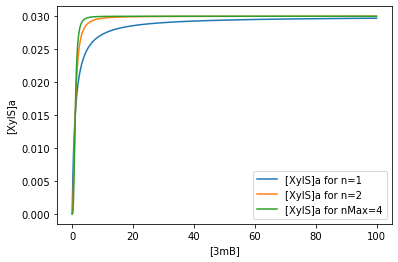

In [3]:
#XylSpercelula=0.001
#nCelulas=10**9
#XylS=XylSpercelula*nCelulas #concentracion de proteina por celula 1 nanomolar
XylS=0.03 #concentracion micromolar por litro. kingcollege
Kx=1 #micro molar (correcto, libro)
nMax=4 #1=union uno a uno (entre 1 y 4) >1 termet cooperative reactions (pag.292 appendix A, pag 7 anexo realmente)
#el promotor lac tiene un n =2 
#ligand of substrate concentration
TmB=np.linspace(0,100,50000) #micromolar

#Plot Hill equation
for n in range(1,nMax):
    XylSa=(XylS*TmB**n)/(Kx**n+TmB**n)
    plt.plot(TmB,XylSa)
   

   
#plot function labelling and show
plt.ylabel('[XylS]a')
plt.xlabel('[3mB]')
plt.legend(['[XylS]a for n=1','[XylS]a for n=2','[XylS]a for nMax=4'])
plt.show()


<ipython-input-4-f81235a278e2>:23: RuntimeWarning: divide by zero encountered in true_divide
  mRNA=beta/(1+(Kd**2/((XylS*TmB**n)/(Kx**n+TmB**n)*Kd+2*(XylS*TmB**n)/(Kx**n+TmB**n))))
<ipython-input-4-f81235a278e2>:23: RuntimeWarning: divide by zero encountered in true_divide
  mRNA=beta/(1+(Kd**2/((XylS*TmB**n)/(Kx**n+TmB**n)*Kd+2*(XylS*TmB**n)/(Kx**n+TmB**n))))
<ipython-input-4-f81235a278e2>:23: RuntimeWarning: divide by zero encountered in true_divide
  mRNA=beta/(1+(Kd**2/((XylS*TmB**n)/(Kx**n+TmB**n)*Kd+2*(XylS*TmB**n)/(Kx**n+TmB**n))))


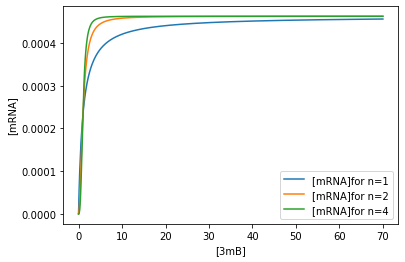

In [4]:
KoffMax=80
Koffmin=0.2
Konmin=0.001
KonMax=1.2
Kdmin=Koffmin/Konmin
KdMax=KoffMax/KonMax

Koff=40.1
Kon=0.6005
Kd=Koff/Kon

nMax=4 
beta=1


TmB=np.linspace(0,70,500) #micromolar

#Plot Hill equation
for n in range(1,nMax):
    #mRNA=beta/(1+Kd/((XylS*TmB**n)/(Kx**n+TmB**n)))
    #mRNA=beta/(1+((XylS*TmB**n)/(Kx**n+TmB**n))/(Kd+(XylS*TmB**n)/(Kx**n+TmB**n)))
    #mRNA=beta/(1+(Kd/(XylS*TmB**n)/(Kx**n+TmB**n)))
    mRNA=beta/(1+(Kd**2/((XylS*TmB**n)/(Kx**n+TmB**n)*Kd+2*(XylS*TmB**n)/(Kx**n+TmB**n))))
    plt.plot(TmB,mRNA)
    
    mRNA
   
#plot function labelling and show
plt.ylabel('[mRNA]')
plt.xlabel('[3mB]')
plt.legend(['[mRNA]for n=1','[mRNA]for n=2','[mRNA]for n=4'])
plt.show()

<ipython-input-7-02a57aaaa38e>:3: RuntimeWarning: divide by zero encountered in true_divide
  mRNA=beta/(1+(Kd**2/((XylS*TmB**n)/(Kx**n+TmB**n)*Kd+2*(XylS*TmB**n)/(Kx**n+TmB**n))))
<ipython-input-7-02a57aaaa38e>:7: RuntimeWarning: divide by zero encountered in true_divide
  mRNA=beta/(1+(Kdmin**2/((XylS*TmB**n)/(Kx**n+TmB**n)*Kdmin+2*(XylS*TmB**n)/(Kx**n+TmB**n))))
<ipython-input-7-02a57aaaa38e>:12: RuntimeWarning: divide by zero encountered in true_divide
  mRNA=beta/(1+(KdMax**2/((XylS*TmB**n)/(Kx**n+TmB**n)*KdMax+2*(XylS*TmB**n)/(Kx**n+TmB**n))))


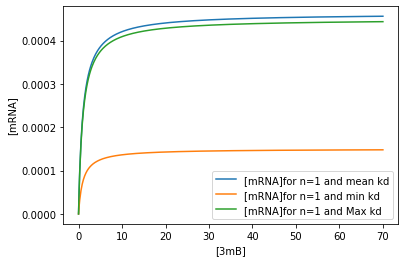

In [7]:
    n=1
    #mRNA=beta/(1+Kd/((XylS*TmB**n)/(Kx**n+TmB**n)))
    mRNA=beta/(1+(Kd**2/((XylS*TmB**n)/(Kx**n+TmB**n)*Kd+2*(XylS*TmB**n)/(Kx**n+TmB**n))))
    plt.plot(TmB,mRNA)
    
    #mRNA2=beta/(1+Kdmin/((XylS*TmB**n)/(Kx**n+TmB**n)))
    mRNA=beta/(1+(Kdmin**2/((XylS*TmB**n)/(Kx**n+TmB**n)*Kdmin+2*(XylS*TmB**n)/(Kx**n+TmB**n))))
    plt.plot(TmB,mRNA2)
   
     
    #mRNA3=beta/(1+KdMax/((XylS*TmB**n)/(Kx**n+TmB**n)))
    mRNA=beta/(1+(KdMax**2/((XylS*TmB**n)/(Kx**n+TmB**n)*KdMax+2*(XylS*TmB**n)/(Kx**n+TmB**n))))
    plt.plot(TmB,mRNA3)
    
    
plt.legend(['[mRNA]for n=1 and mean kd','[mRNA]for n=1 and min kd','[mRNA]for n=1 and Max kd'])
plt.ylabel('[mRNA]')
plt.xlabel('[3mB]')
plt.show()

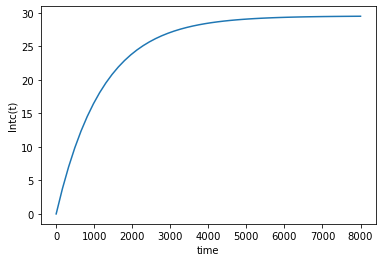

In [6]:
# function that returns dy/dt
#membrana y mRNA cte
def model(Intc, t):
    Intm=0
    mRNA= 0.0045#50 MICROMOLAR 3MB n=1
    k3 = 5.45 #segs^-1 kingcollege
    d2 = 8.3*10**(-4) #segs^-1 kingcollege
    Vmax=0
    km= 1
    #nu = 1 #1 - Intm/Intc
    cteB = Intc*Vmax/(Intc+km)#*nu
    dIntdt = k3*mRNA-d2*Intc-cteB*Intc
    return dIntdt

# initial condition
Intc0 = 0

# time points
t = np.linspace(0,8000)

# solve ODE
Intc = odeint(model,Intc0,t)

# plot results
plt.plot(t,Intc)
plt.xlabel('time')
plt.ylabel('Intc(t)')
plt.show()